In [22]:
#For testing, import the user name
from env import api_key
import requests
import pandas as pd
from bs4 import BeautifulSoup
from env import api_key
from time import sleep
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
from acquire import *
from prepare import *

pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.reset_option("display.max_rows", "display.max_columns")

import re

In [23]:
df_10 = pd.read_csv('final_10.csv')

In [24]:
df_10.drop(columns = ['Unnamed: 0'],inplace = True)

In [25]:
df = df_10

In [26]:
train,test = prepare(df)

In [27]:
train['BlueTeamLevelDifference'] = train.BlueTeamLevel - train.RedTeamLevel

In [28]:
train['BlueTeamLevelDifference'] = train.BlueTeamLevel - train.RedTeamLevel
train['BlueTeamXpDifference'] = train.BlueTeamXp - train.RedTeamXp
train['BlueTeamWardDifference'] = train.BlueTeamWards - train.RedTeamWards
train['blueteam_win'] = train['winningTeam'] == 100

In [29]:
train['BlueTeamXpDifference'] = train.BlueTeamXp - train.RedTeamXp

In [30]:
train['BlueTeamWardDifference'] = train.BlueTeamWards - train.RedTeamWards

In [31]:
train['BlueTeamWin'] = train['winningTeam'] == 100

In [32]:
train['BlueTeamDeathDifference'] = (train.deathsplayer_1 +
                                    train.deathsplayer_2 +
                                    train.deathsplayer_3 +
                                    train.deathsplayer_4 +
                                    train.deathsplayer_5) - (train.deathsplayer_6 +
                                    train.deathsplayer_7 +
                                    train.deathsplayer_8 +
                                    train.deathsplayer_9 +
                                    train.deathsplayer_10)

In [33]:
train['BlueTeamMonstersKilled'] = (train.jungleMinionsKilled_1 +
                                   train.jungleMinionsKilled_2 +
                                   train.jungleMinionsKilled_3 +
                                   train.jungleMinionsKilled_4 +
                                   train.jungleMinionsKilled_5)

In [34]:
train['RedTeamMonstersKilled'] = (train.jungleMinionsKilled_6 +
                                   train.jungleMinionsKilled_7 +
                                   train.jungleMinionsKilled_8 +
                                   train.jungleMinionsKilled_9 +
                                   train.jungleMinionsKilled_10)

In [35]:
train['BlueTeamMonsterKillDifference'] = train.BlueTeamMonstersKilled - train.RedTeamMonstersKilled

In [36]:
train.head(1)

,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,time_cutoff,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200,BlueTeamDeaths,RedTeamDeaths,BlueTeamGoldPerSec,RedTeamGoldPerSec,BlueTeamJungleMinionsKilled,RedTeamJungleMinionsKilled,BlueTeamKills,RedTeamKills,BlueTeamLevel,RedTeamLevel,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,BlueTeamTotalDamageDon

In [40]:
train('airdragon_team100','airdragon_team200')

TypeError: 'DataFrame' object is not callable

In [41]:
train = train[['BlueTeamWin',
              'chemtechdragon_team100',
             'dragon_team100',
             'BlueTeamDeathDifference',
             'dragon_team100',
             'dragon_team200',
             'earthdragon_team100',
             'earthdragon_team200',
             'firedragon_team100',
             'firedragon_team200',
             'gameDuration',
             'hextechdragon_team100',
             'hextechdragon_team200',
              'BlueTeamMonsterKillDifference',
              'RedTeamMonstersKilled',
              'BlueTeamMonstersKilled',
              'BlueTeamDeathDifference',
              'waterdragon_team100',
              'chemtechdragon_team200',
              'riftherald_team200',
              'airdragon_team200',
              'waterdragon_team200',
              'BlueTeamDeaths',
              'RedTeamDeaths',
              'BlueTeamKills',
              'RedTeamKills',
              'BlueTeamMagicDamageDoneToChampions',
              'RedTeamMagicDamageDoneToChampions',
              'BlueTeamMinionsKilled',
              'RedTeamMinionsKilled',
              'BlueTeamPhysicalDamageDoneToChampions',
              'RedTeamPhysicalDamageDoneToChampions',
              'BlueTeamTimeEnemySpentControlled',
              'RedTeamTimeEnemySpentControlled',
              'BlueTeamTotalDamageDoneToChampions',
              'RedTeamTotalDamageDoneToChampions',
              'BlueTeamTotalGold',
              'RedTeamTotalGold',
              'BlueTeamTrueDamageDoneToChampions',
              'RedTeamTrueDamageDoneToChampions',
              'BlueTeamWards',
              'RedTeamWards',
              'BlueTeamAssists',
              'RedTeamAssists',
              'BlueTeamXp',
              'RedTeamXp',
              'BlueTeamTotalGoldDifference',
              'BlueTeamMVPKills',
              'BlueTeamLevelDifference',
              'BlueTeamXpDifference',
              'blueteam_win']]

In [42]:
train

,BlueTeamWin,chemtechdragon_team100,dragon_team100,BlueTeamDeathDifference,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,hextechdragon_team100,hextechdragon_team200,BlueTeamMonsterKillDifference,RedTeamMonstersKilled,BlueTeamMonstersKilled,BlueTeamDeathDifference,waterdragon_team100,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200,BlueTeamDeaths,RedTeamDeaths,BlueTeamKills,RedTeamKills,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,BlueTeamTotalDamageDoneToChampions,RedTeamTotalDamageDoneToChampions,BlueTeamTotalGold,RedTeamTotalGold,BlueTeamTrueDamageDoneToChampions,RedTeamTrueDamageDoneToChampions,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,BlueTeamMVPKills,BlueTeamLevelDifference,BlueTeamXpDifference,blueteam_win
3513,False,0.0,1.0,-4.0,1.0,0.0,0.0,0.0,1.0,0.0,2168,0.0,0.0,10.0,44.0,54.0,-4.0,0.0,0.0,0.0,0.0,0.0,4,8,8,4,4418,5192,192,190,6593,5488,401302,290628,11500,11588,16113,15067,487,905,35,208,9,2,17886,15180,1046,2.0,6,2706,False
1250,False,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,1928,0.0,0.0,8.0,52.0,60.0,-3.0,0.0,0.0,0.0,0.0,0.0,3,6,6,3,3617,4519,226,193,9274,6371,355801,278804,13729,11346,16660,15333,835,450,14,12,9,5,18575,16532,1327,3.0,2,2043,False
3532,True,0.0,1.0,-7.0,1.0,0.0,0.0,0.0,0.0,0.0,1912,1.0,0.0,12.0,52.0,64.0,-7.0,0.0,0.0,0.0,0.0,0.0,3,10,10,3,2008,4644,227,204,10075,8822,334801,400022,12518,14108,19832,15313,432,638,19,14,5,3,21106,17694,4519,4.0,3,3412,True
3858,False,0.0,0.0,-3.0,0.0,1.0,0.0,0.0,0.0,1.0,1890,0.0,0.0,-8.0,64.0,56.0,-3.0,0.0,0.0,0.0,0.0,0.0,9,12,12,9,6012,6595,213,171,10534,5571,351805,375939,18813,12917,18884,17451,2262,747,29,16,9,11,18593,17114,1433,5.0,1,1479,False
528,True,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,1.0,1824,0.0,0.0,-15.0,55.0,40.0,-2.0,0.0,0.0,1.0,0.0,0.0,9,11,11,9,7679,9876,188,197,7935,5000,231642,259962,16812,15932,17716,16882,1197,1052,12,193,10,7,18305,17077,834,4.0,1,1228,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,0.0,0.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,2164,0.0,0.0,11.0,38.0,49.0,-8.0,0.0,0.0,0.0,0.0,0.0,6,14,14,6,7577,5534,207,154,12252,8139,408303,440076,21641,15020,19403,14784,1809,1345,18,10,10,7,18275,15159,4619,5.0,3,3116,False
4060,False,0.0,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1523,0.0,0.0,-4.0,48.0,44.0,7.0,0.0,0.0,0.0,0.0,0.0,11,4,4,11,7488,4806,172,212,5356,11167,352066,323305,14220,17028,15704,17815,1370,1052,14,13,5,13,15977,18056,-2111,2.0,-3,-2079,False
1346,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1732,0.0,0.0,5.0,51.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,8,8,2395,2919,183,205,9920,9298,199400,205078,12844,13192,17589,17339,526,972,14,10,8,9,18739,17614,250,4.0,1,1125,True
3454,True,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1671,0.0,0.0,4.0,60.0,64.0,0.0,1.0,0.0,0.0,0.0,0.0,4,4,4,4,3184,2932,228,218,8200,8335,398893,304929,11385,11830,16759,15165,0,560,14,15,6,3,18604,18467,1594,2.0,2,137,True


In [43]:
btwin_train = train[train.blueteam_win == True]

1. Top
2. Jungle
3. Mid
4. Bot
5. Support
6. Top
7. Jungle
8. Mid
9. Bot
10. Support

In [44]:
rtwin_train = train[train.blueteam_win == False]

Text(0.5, 1.0, 'Features Correlation With gameDuration')

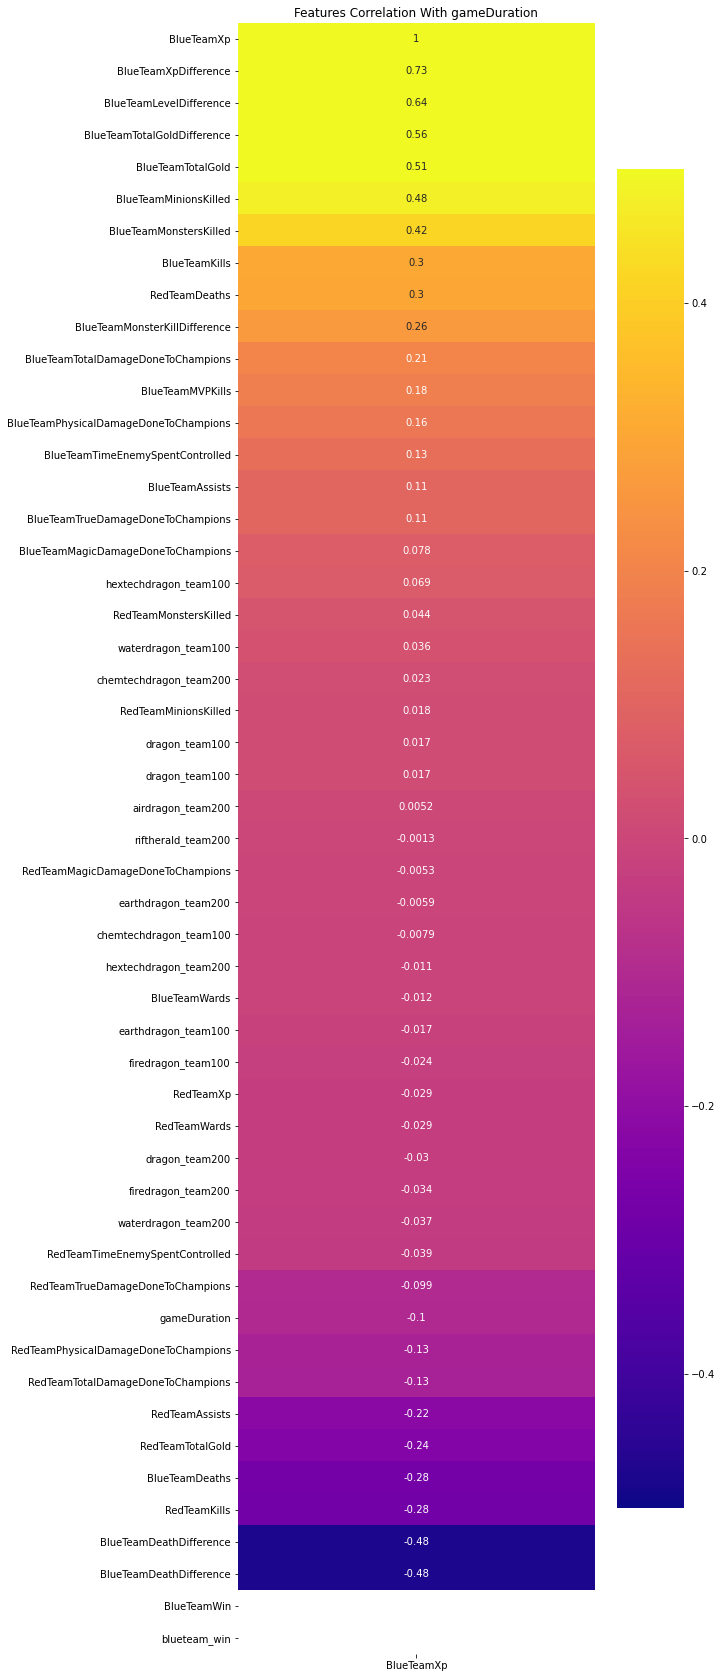

In [55]:
# redteamXP correlation when blue team wins
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(btwin_train.corr()[['BlueTeamXp']].sort_values(by = 'BlueTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

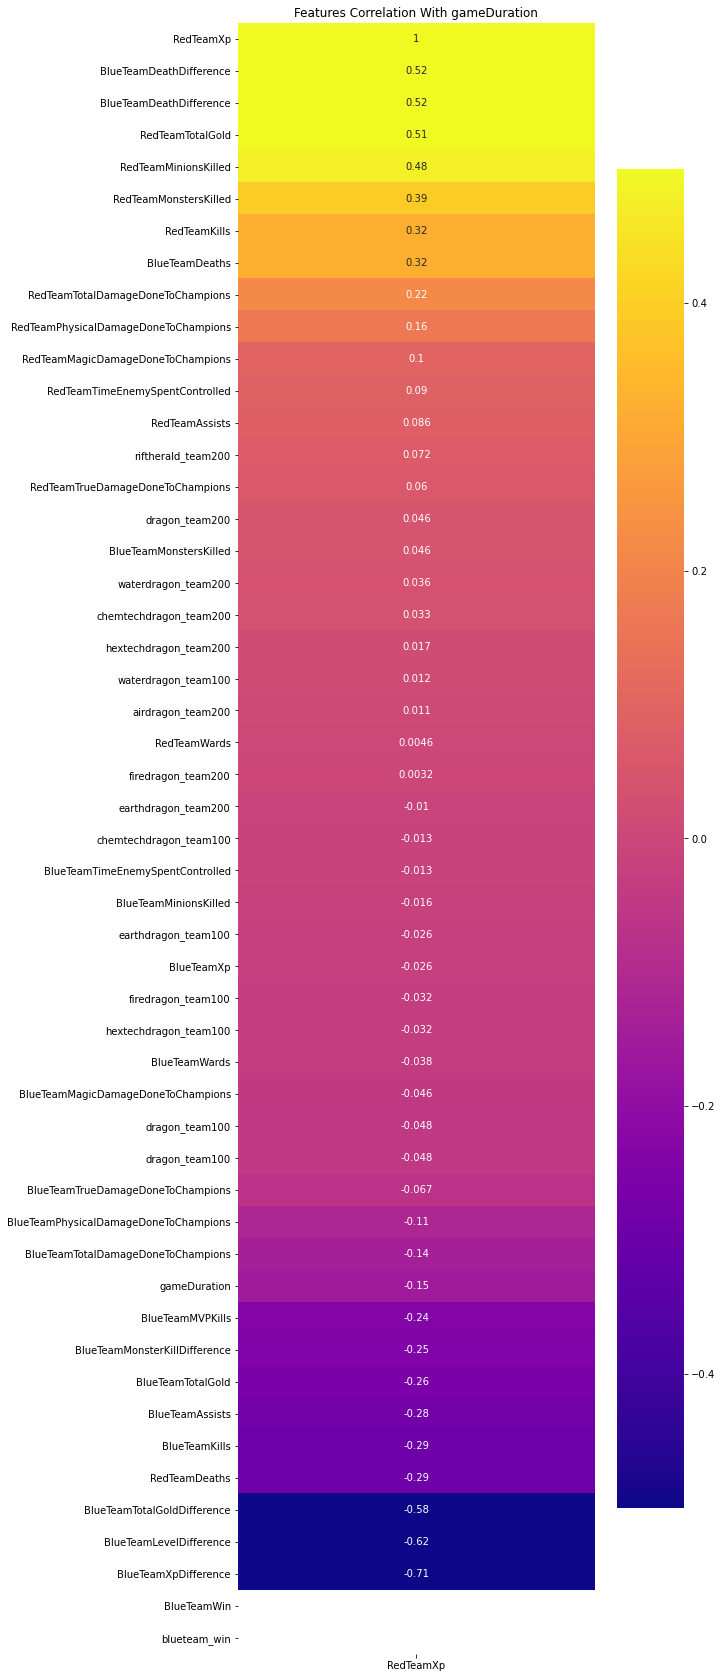

In [56]:
# redteamXP correlation when blue team wins
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(rtwin_train.corr()[['RedTeamXp']].sort_values(by = 'RedTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

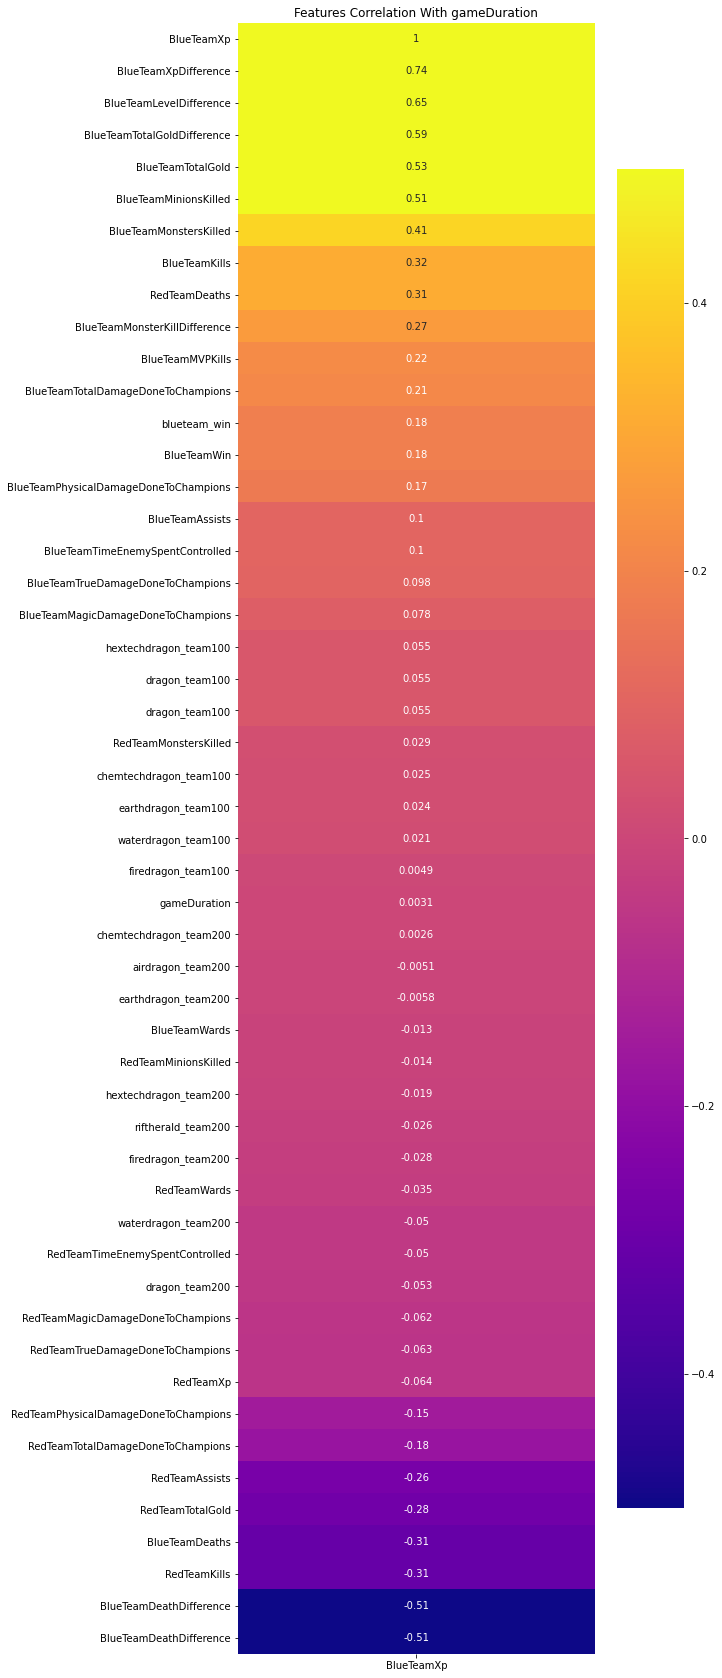

In [57]:
# blueteamXP correlation when blue team wins
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(train.corr()[['BlueTeamXp']].sort_values(by = 'BlueTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

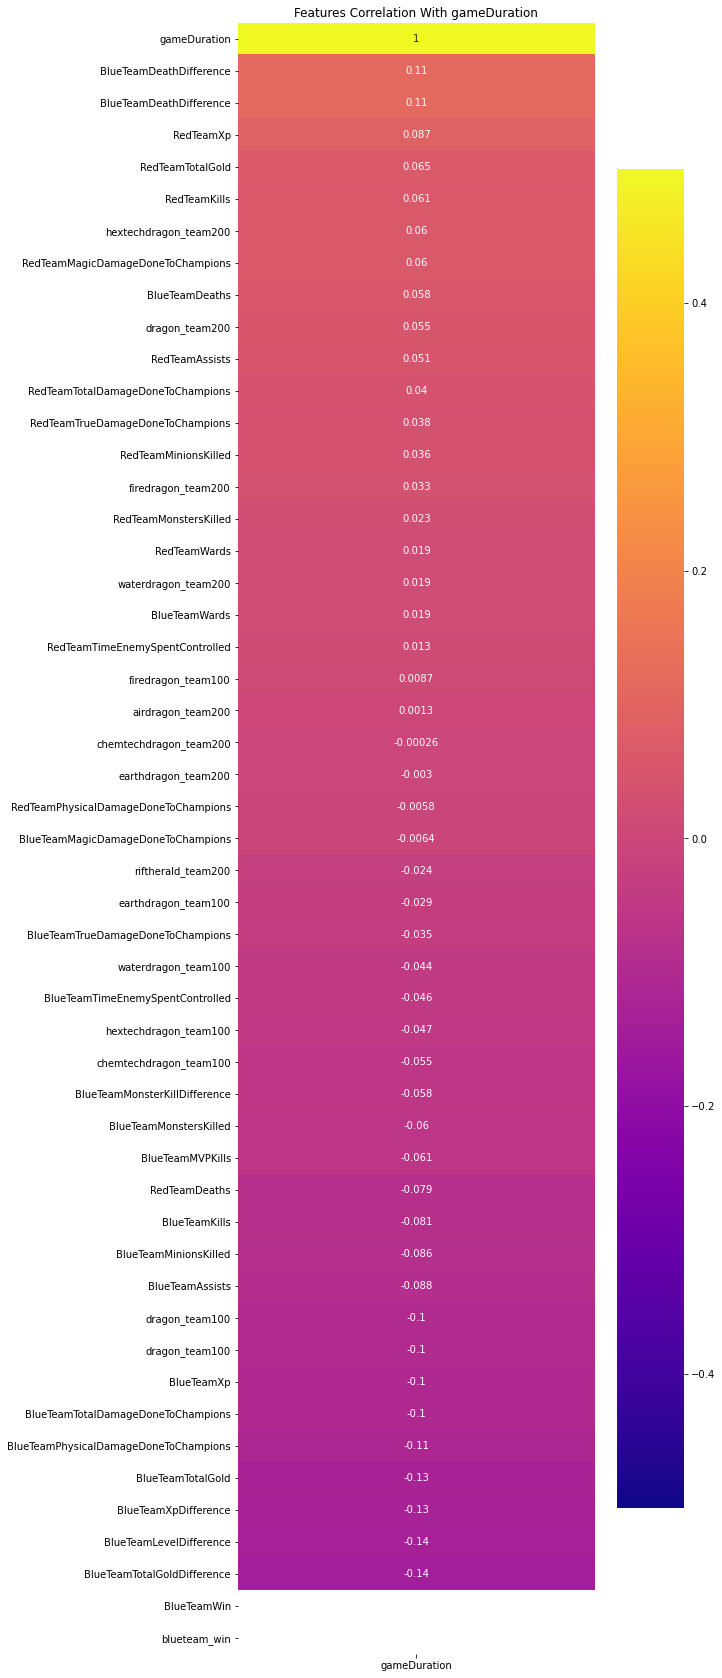

In [58]:
# Game duration correlation when blue team wins
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(btwin_train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

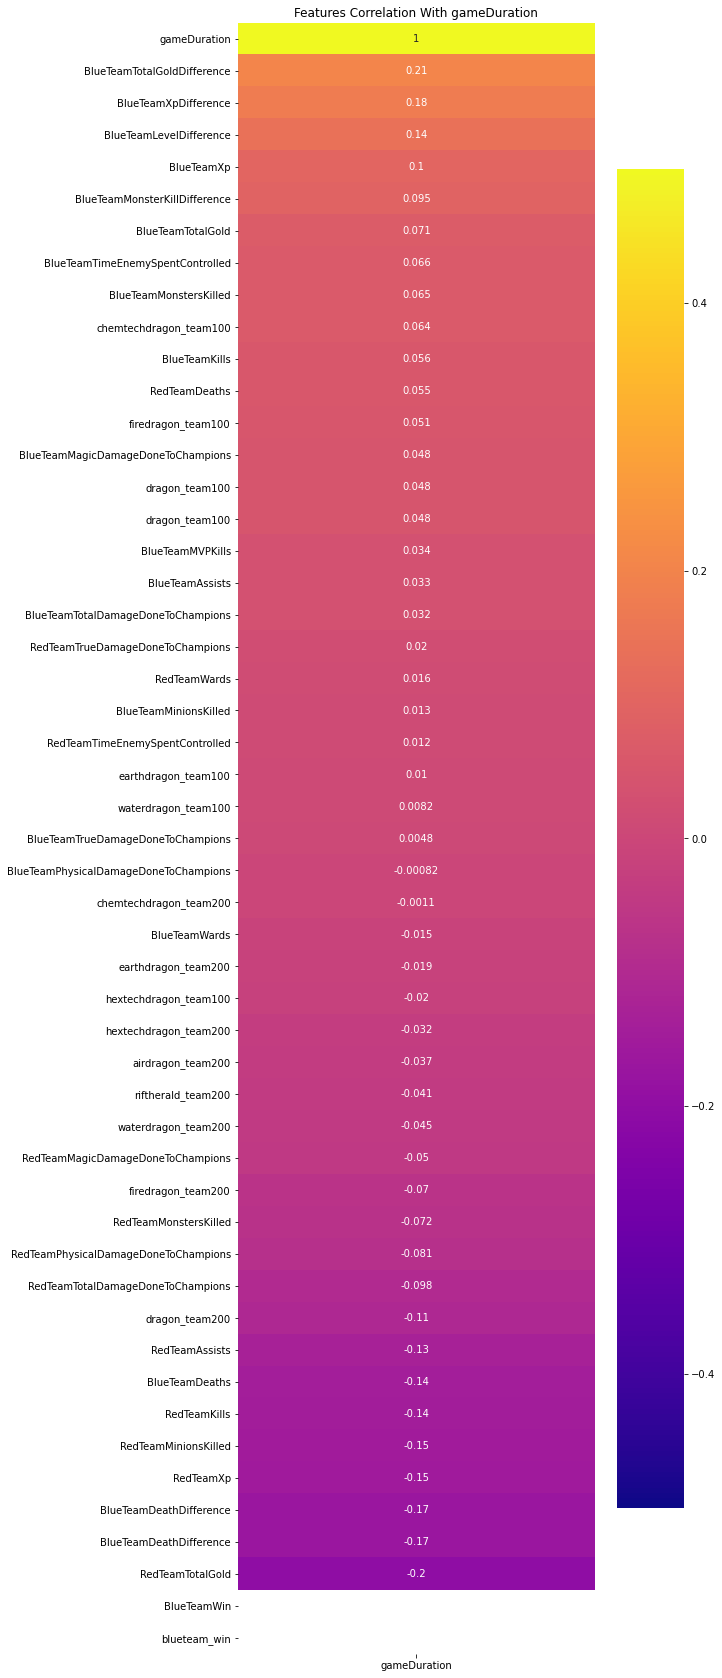

In [59]:
# Game duration correlation when red team wins
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(rtwin_train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

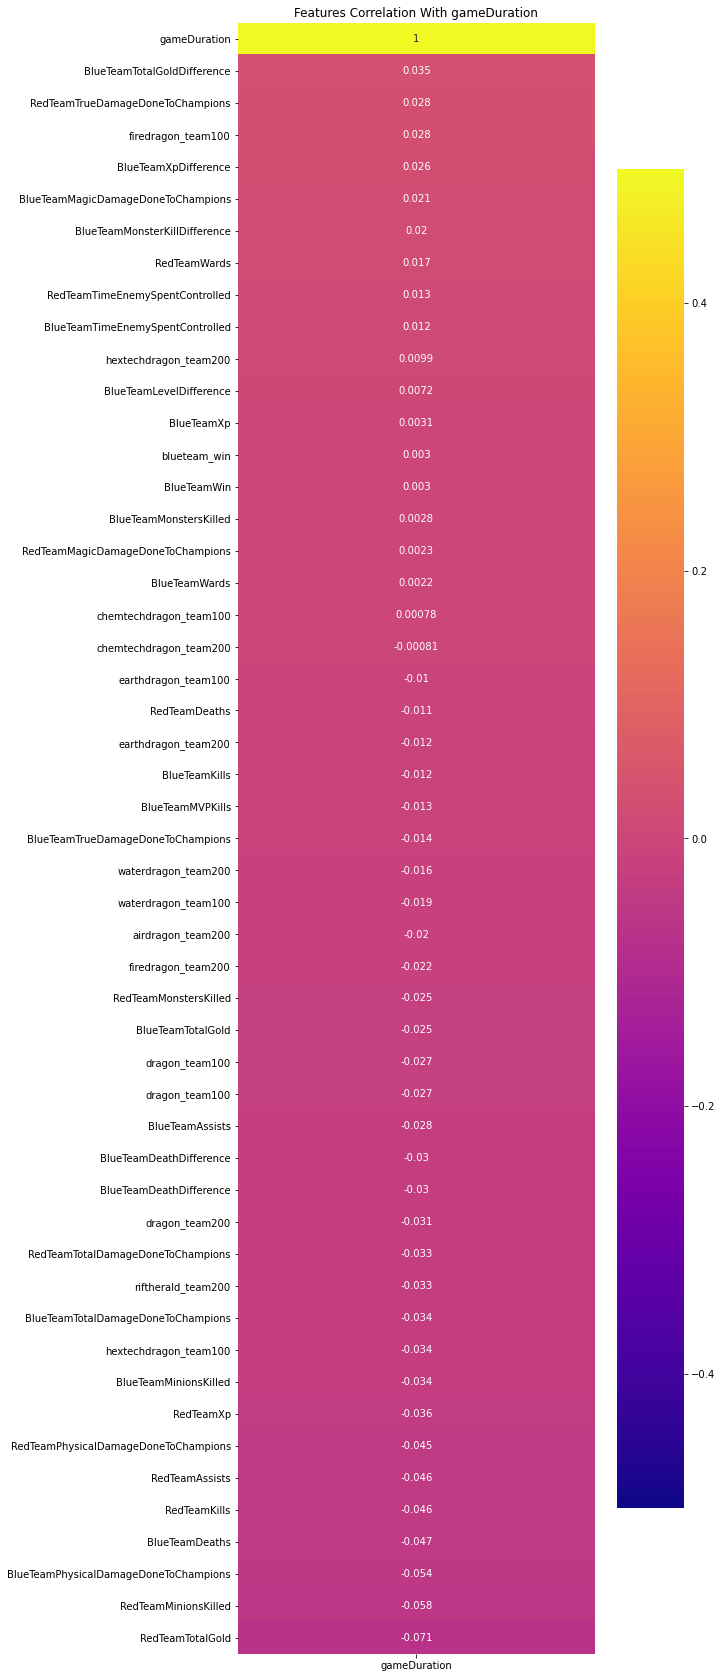

In [60]:
# game duration correlation for both teams
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

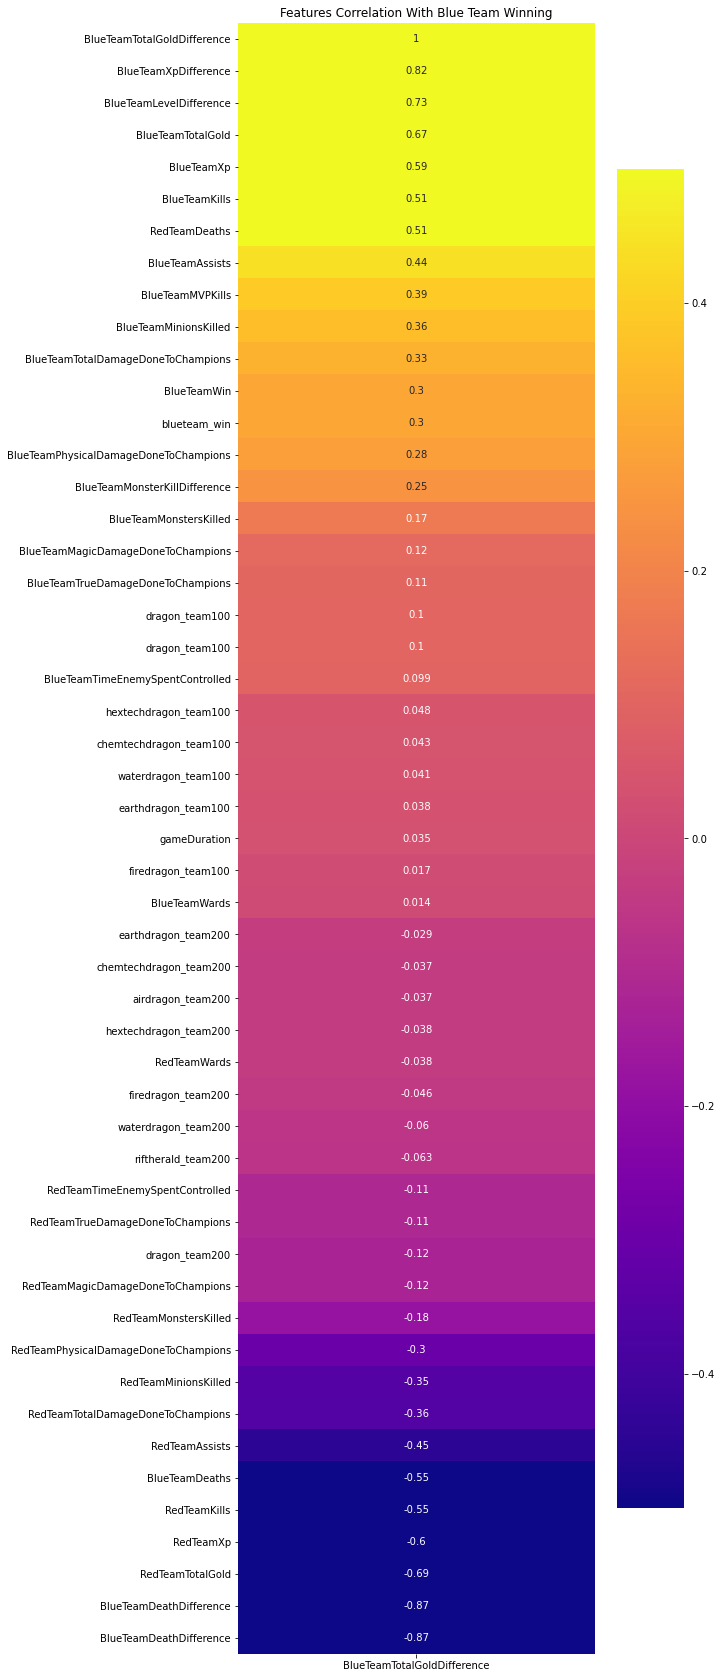

In [61]:
# blue team gold difference correlation
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

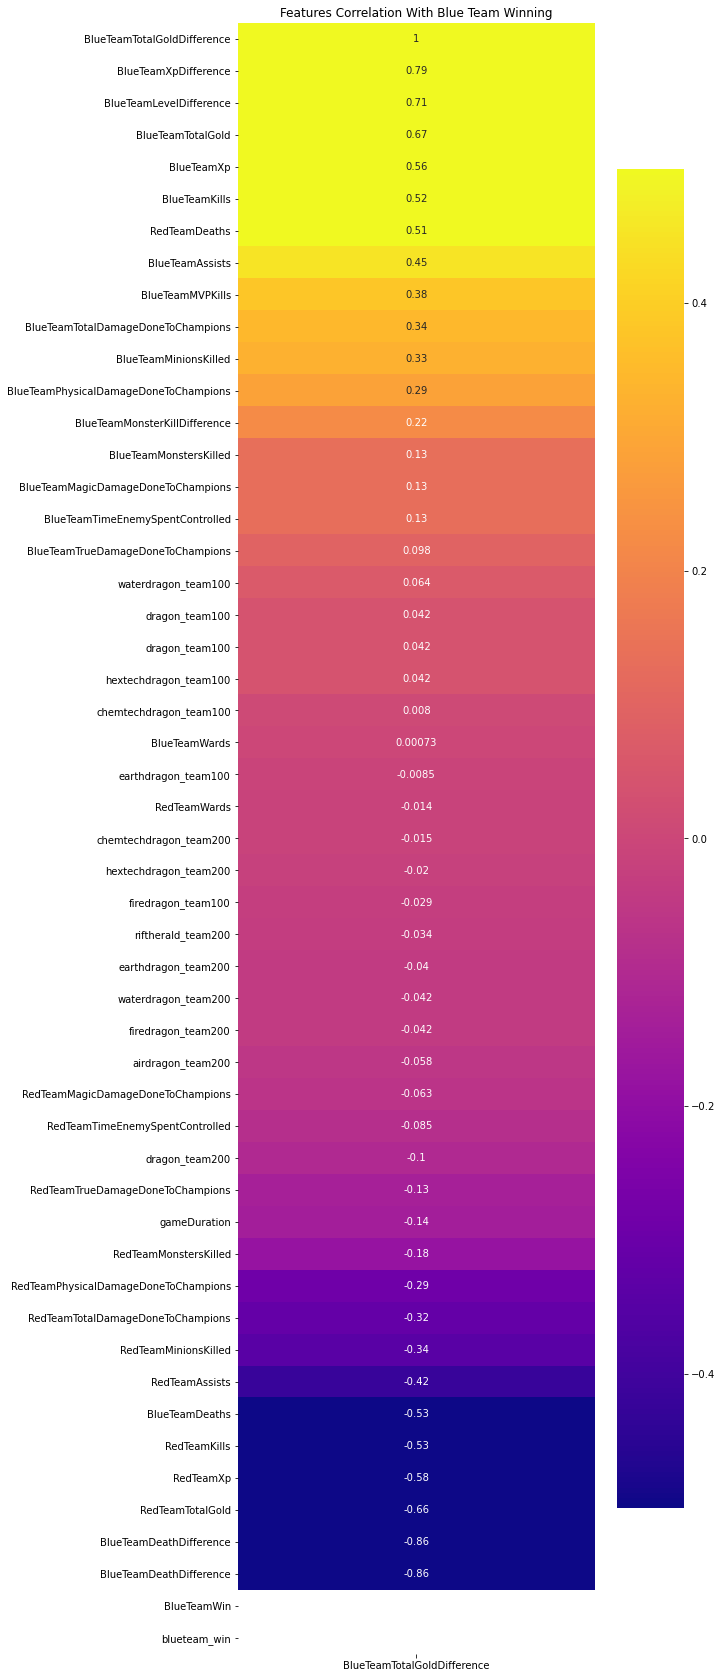

In [62]:

plt.figure(figsize = (8,30))
heatmap = sns.heatmap(btwin_train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

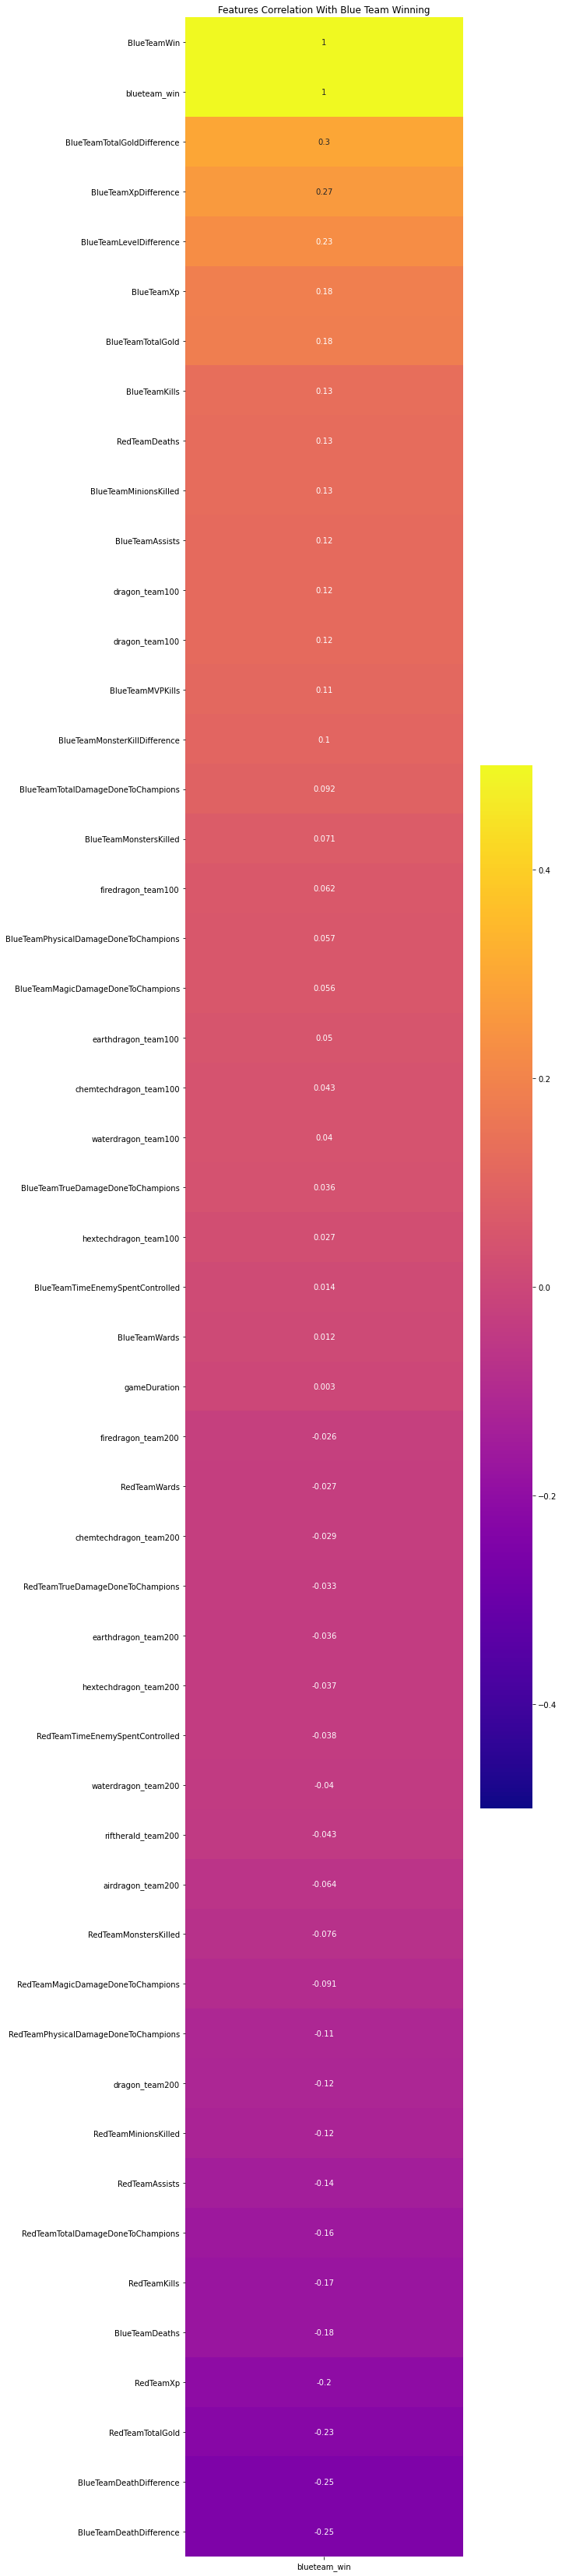

In [63]:
plt.figure(figsize = (8,30))
heatmap = sns.heatmap(train.corr()[['blueteam_win']].sort_values(by = 'blueteam_win',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')